In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./marketing_campaign.csv',sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Task 1

In [3]:
# Количество жалоб
df['Complain'].sum()

21

In [4]:
#Средний возраст покупателей
mnt_columns = df.filter(like="Mnt")
filter_df = df[(mnt_columns !=0).any(axis=1)] # В датасете с данными указано, что все данные по покупкам за последние 2 года, поэтому нигде по сути эта характеристика не учитывается
mean_Year_Birth = np.mean(filter_df["Year_Birth"])
ans = 2024-mean_Year_Birth # Столбца с возрастом в датасете нет, поэтому я использую разность между сегодняшним годом и годом рождения покупателя. Надеюсь это имелось ввиду
ans

55.19419642857133

Task 2

/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lad1chka/miniconda3/envs/my-environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

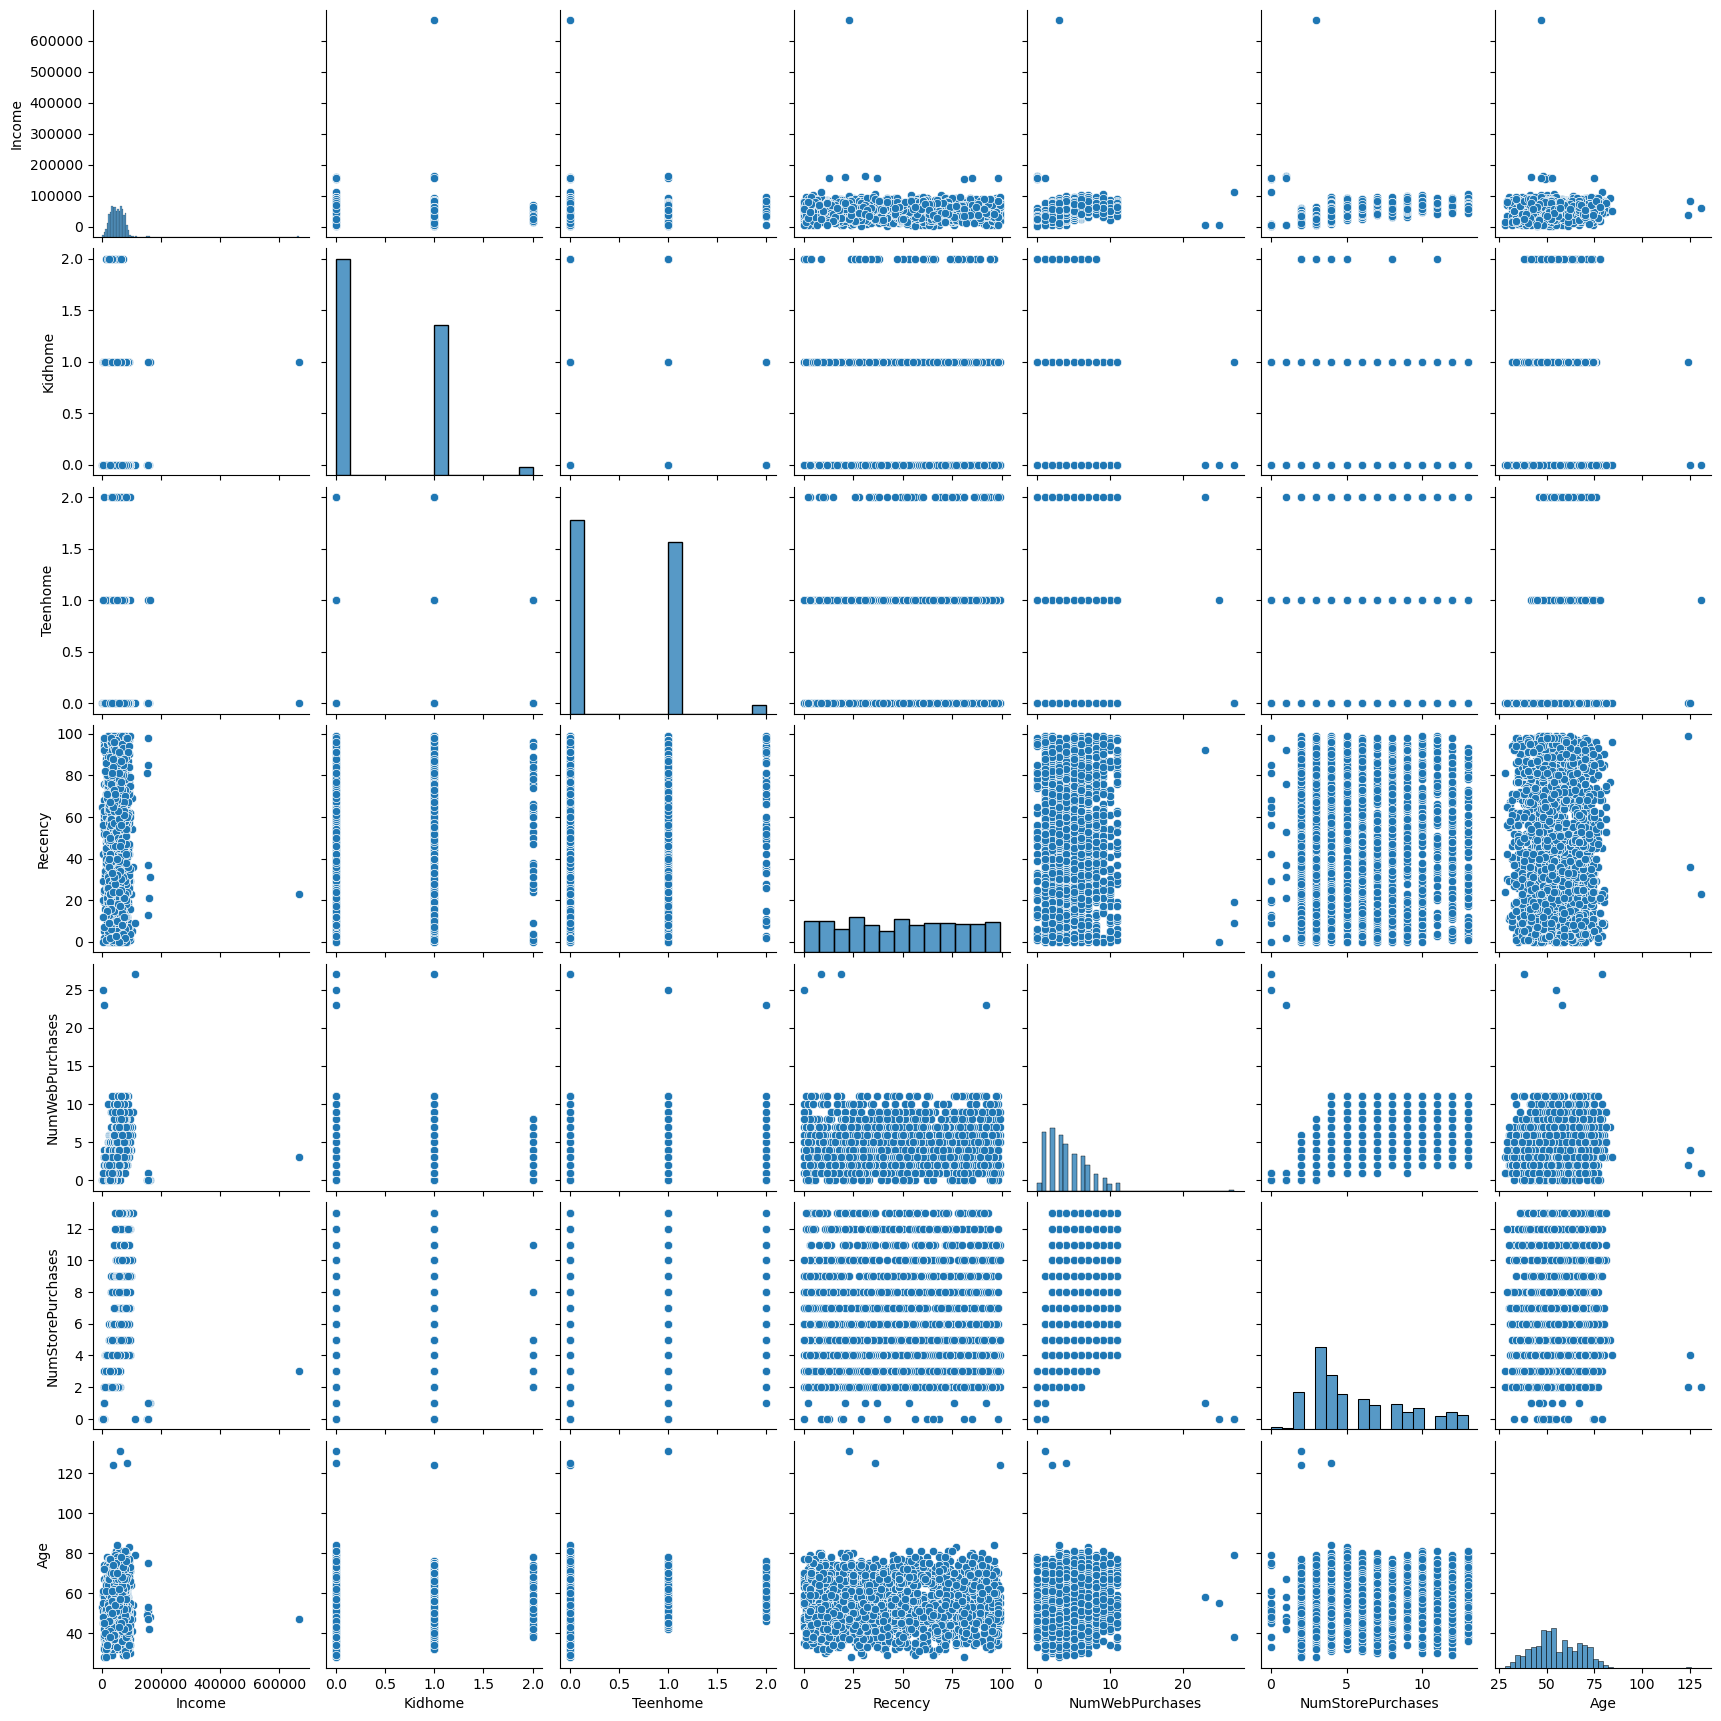

In [5]:
df["Age"] = 2024 - df["Year_Birth"]
filter_df = df[["Education",
"Marital_Status",
"Income",
"Kidhome",
"Teenhome",
"Recency",
"NumWebPurchases",
"NumStorePurchases",
"Age"]]
sns.pairplot(filter_df) # Предупреждение связано с будущими изменениями в библиотеке seaborn, оно незначителньо

Можем увидеть зависимости между следующими парами колонок:

---


NumWebPurchases - Age: есть небольшая зависимость
NumWebPurchases и NumStorePurchases - Income: чем больше доход, тем больше покупок совершается, есть небольшая зависимость

---


NumWebPurchases - NumStorePurchases: есть небольшая зависимость (мне кажется, не очень объяснимая, казалось бы, чем больше покупок в интернете, тем меньше люди ходят в магазины за покупками). Также есть заметная группа людей, которые редко посещают магазины, но делают много онлайн покупок.

---


Age - Kidhome и Teenhome: чем старше люди, тем чаще у них есть дети и подростки в семье, при этом при большом возрасте у людей все меньше именно детей

---


Recency - Kidhome и Teenhome: чем больше детей и подростков в семье, тем больше Recency, т.е. люди чуть реже ходят в магазины

---

Income - Kidhome и Teenhome: чем больше детей и подростков в семье, тем в среднем меньше доход.